In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from PIL import Image

# Loading samples and analyzing them

In [26]:
class MultiViewTemporalSample:

    def __init__(self, sample_path: str) -> None:
        

        self.photos = []
        for timestep in range(0,7):
            timestep_photos = []
            for prespective in ["B05","B04","B03","B02","B01","G01","G02","G03","G04","G05"]:
                name = str(timestep) + "-" + prespective + ".png"
                im = Image.open(os.path.join(sample_path, name))
                #TODO: apply first preprocesseing steps here (e.g. using the mask)
                timestep_photos.append(im)

            self.photos.append(timestep_photos)

        self.homography = json.load(open(os.path.join(sample_path, "homographies.json")))
    
    def show_photo_grid(self):

        fig, ax = plt.subplots(7,10,figsize=(15,10))
        for row, timeframe in enumerate(self.photos):
            for col, perspective in enumerate(timeframe):
                ax[row, col].imshow(np.array(perspective))
                ax[row, col].axis("off")
                ax[row, col].set_xticklabels([])
                ax[row, col].set_yticklabels([])

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

def load_data(path:str):#TODO: add lazy loading maybe
    samples = [MultiViewTemporalSample(os.path.join(path, s)) for s in os.listdir(path) if os.path.isdir(os.path.join(path, s))]

    return samples


    

<Figure size 432x288 with 0 Axes>

In [27]:
samples = load_data("data/train")

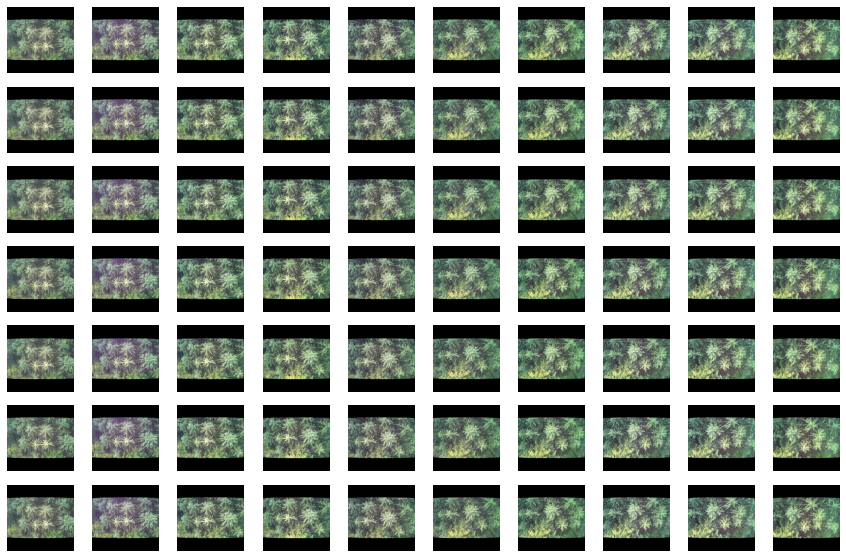

In [30]:
samples[0].show_photo_grid()